In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_json("https://restcountries.eu/rest/v2/all")

In [4]:
tips = sns.load_dataset('tips')

### Session 18 - 25/04/2020

#### Divide countries into 4 bins based on the area of the country and call them as small, medium, big, large in terms of area

In [6]:
area_bins = pd.cut(df['area'],4,labels=['Small','Medium','Big','Large'])
area_bins

0      Small
1      Small
2      Small
3      Small
4      Small
       ...  
245    Small
246    Small
247    Small
248    Small
249    Small
Name: area, Length: 250, dtype: category
Categories (4, object): [Small < Medium < Big < Large]

#### Divide countries into 3 bins based on density and call them as low, medium and high

In [7]:
density_bins = pd.cut(df['population']/df['area'],3,labels=['Low','Medium','High'])
density_bins

0      Low
1      Low
2      Low
3      Low
4      Low
      ... 
245    Low
246    Low
247    Low
248    Low
249    Low
Length: 250, dtype: category
Categories (3, object): [Low < Medium < High]

#### Convert region to dummies and display country name and region

In [8]:
pd.get_dummies(df[['name','region']],columns=['region'])

,name,region_,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania,region_Polar
0,Afghanistan,0,0,0,1,0,0,0
1,Åland Islands,0,0,0,0,1,0,0
2,Albania,0,0,0,0,1,0,0
3,Algeria,0,1,0,0,0,0,0
4,American Samoa,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
245,Wallis and Futuna,0,0,0,0,0,1,0
246,Western Sahara,0,1,0,0,0,0,0
247,Yemen,0,0,0,1,0,0,0
248,Zambia,0,1,0,0,0,0,0


### Session 19 - 27/04/2020

#### Draw a bar graph for total bill amount for each day by male

In [10]:
male_totals = tips[tips['sex'] == 'Male'].groupby('day',as_index=False)['total_bill'].sum()

<BarContainer object of 4 artists>

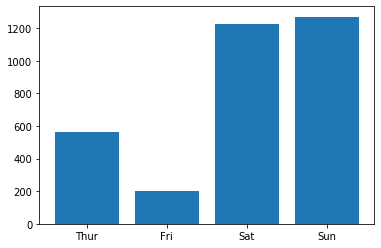

In [11]:
plt.bar(male_totals['day'],male_totals['total_bill'],label='Male Bill')

#### Display a bar graph for population of each region and below that another bar graph for area for each region

In [13]:
region_population = df.groupby('region', as_index=False)['population'].sum()
region_area = df.groupby('region', as_index=False)['area'].sum()

Text(0, 0.5, 'Area')

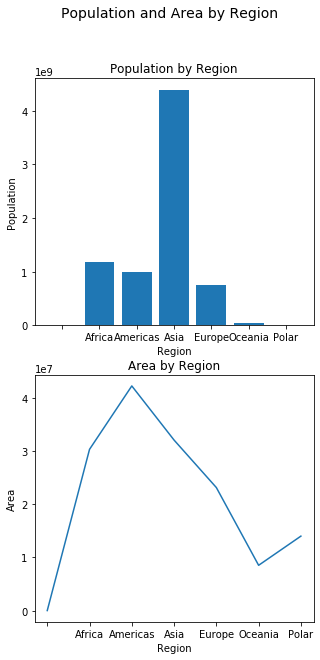

In [14]:
fig,ax = plt.subplots(2,1)
fig.suptitle('Population and Area by Region', fontsize=14)
fig.set_size_inches(5,10)
ax[0].bar(region_population['region'], region_population['population'])
ax[0].set_title("Population by Region")
ax[0].set_xlabel("Region")
ax[0].set_ylabel("Population")

ax[1].plot(region_area['region'].tolist(), region_area['area'])
ax[1].set_title("Area by Region")
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Area")

#fig.savefig("Population_Area_by_Region.jpg") 

### Session 20 - 28/04/2020

#### Display a bar graph showing top 3 countries by population in each continent

In [119]:
lc = df.dropna().groupby('region',as_index = False)['region','name','population'].apply(lambda countries : countries.sort_values(by=['population'], ascending=False).head(3))
lc['fullname'] = lc.apply(lambda s: f"{s['name']} ({s['region']})",axis=1)   # Concatenate name and region 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<BarContainer object of 15 artists>

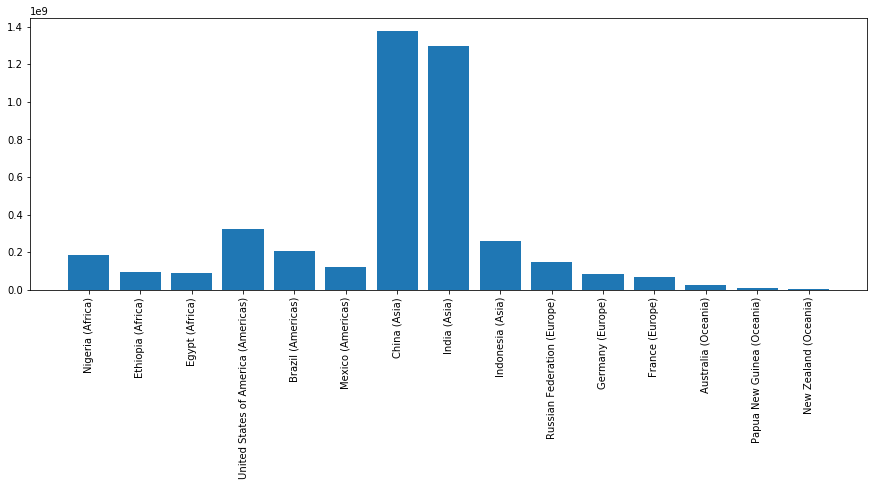

In [120]:
plt.gcf().set_size_inches(15,5)
plt.xticks(rotation = 90)
plt.bar(lc['fullname'], lc['population'])

### Session 21 - 29/04/2020

#### Draw count plot for number of countries in each region

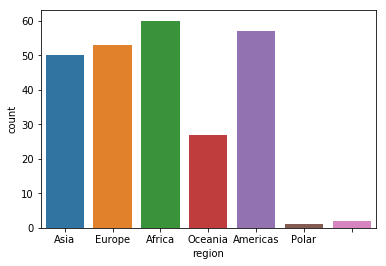

In [4]:
sns.countplot(x="region", data=df)

#### Draw bar graph for average area size in each continent

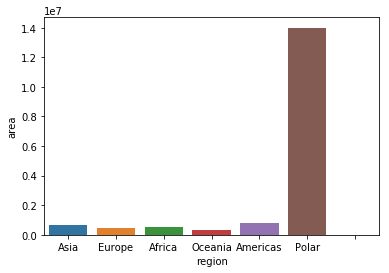

In [7]:
sns.barplot(x="region", y="area", data = df, ci=False)

#### Draw a pair plot comparing population with area

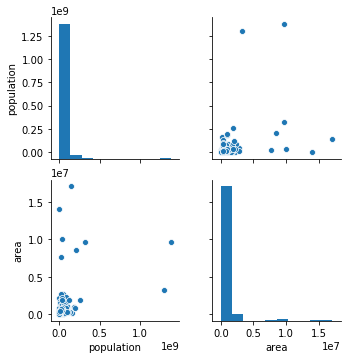

In [8]:
sns.pairplot(df,vars=['population','area'])